# Basic Exploratory Data Analysis
## Prerequisites
- Install Python 3



In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load Feature File
df = pd.read_csv("../TeamSeasons.csv")

## Basic Seed Exploration

In [16]:
tourney_teams = df[df['Seed'].notna()]

In [17]:
set(tourney_teams["ExitRound"].tolist())

{'Champion',
 'Championship',
 'Elite Eight',
 'Final Four',
 'First Round',
 'Play In',
 'Second Round',
 'Sweet Sixteen'}

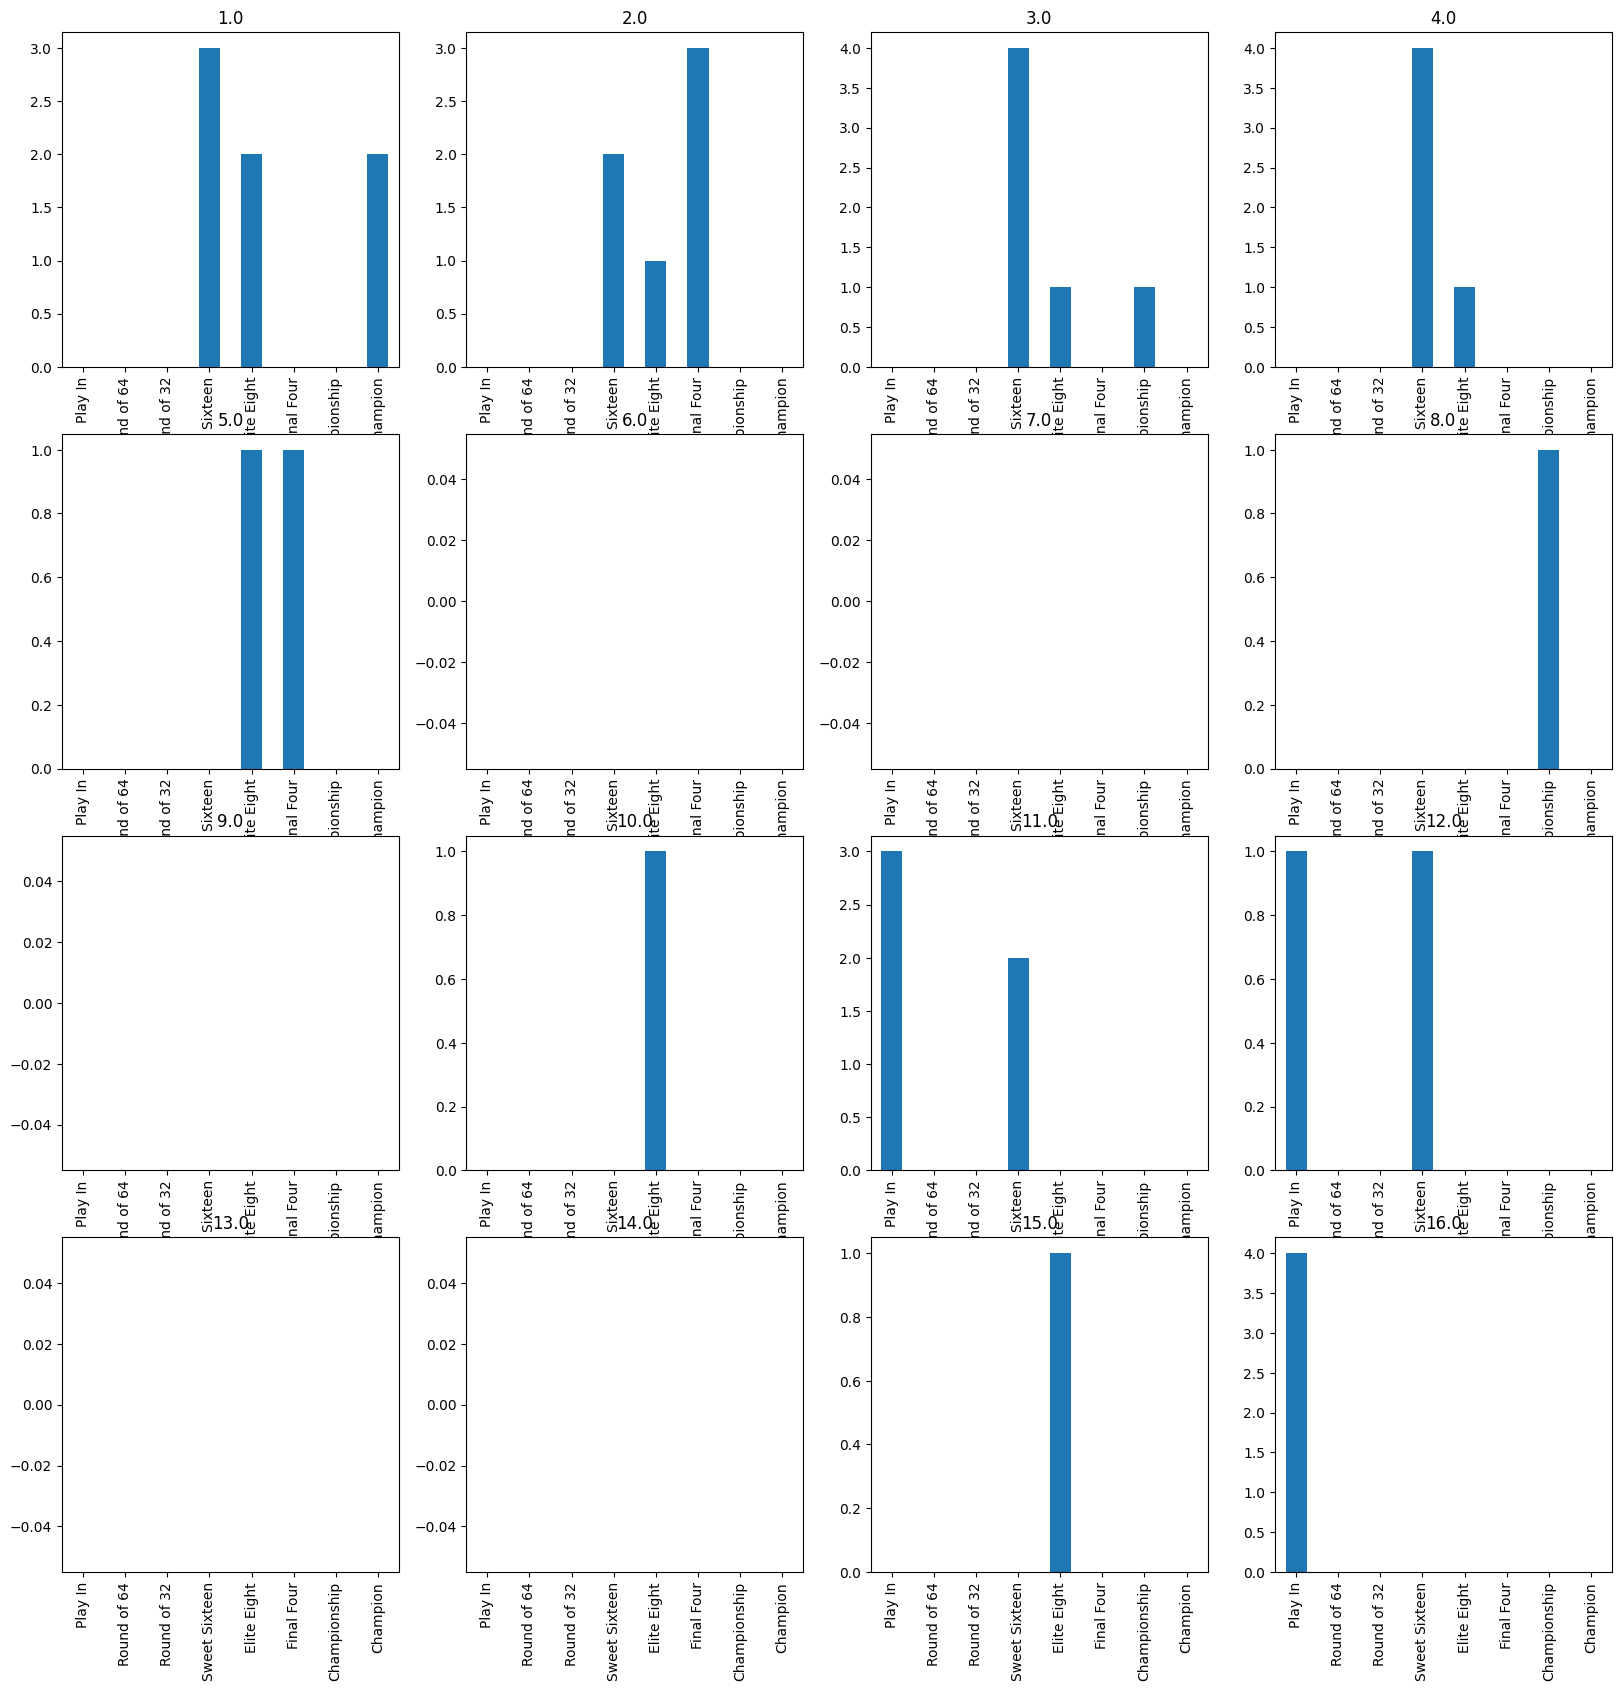

In [18]:
# Visualize the distribution of exit rounds by seed as histograms
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
ax = ax.flatten()
bar_order = [ "Play In", "Round of 64", "Round of 32", "Sweet Sixteen", "Elite Eight", "Final Four", "Championship", "Champion"]
for i, (seed, seed_df) in enumerate(tourney_teams.groupby("Seed")):
    seed_df["ExitRound"].value_counts().reindex(bar_order).plot(kind="bar", title=seed, ax=ax[i])
    # seed_df["ExitRound"].value_counts().plot(kind="bar", title=seed, ax=ax[i])
plt.show()
